# Le pouvoir d'achat des ouvriers anglais du XVIe au XIXe siècle
À travers ce document, nous allons chercher à  recréer le graphique suivant de William Playfair, représentant l'évolution du prix du blé (en barres noires) et les salaires hebdomadaires (zone bleue). Il est disponible [ici](https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png)
<img src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Chart_Showing_at_One_View_the_Price_of_the_Quarter_of_Wheat%2C_and_Wages_of_Labour_by_the_Week%2C_from_1565_to_1821.png" width="600" height="400" />
Commençons par importer les librairies nécessaires. Seaborn est une librairie puissante pour la représentation de données.

In [22]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np
from matplotlib.collections import PatchCollection
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

In [2]:
START_YEAR_PLOT = 1565 
END_YEAR_PLOT = 1830

## Chargement et prétraitement des données
### Chargement des données

In [3]:
# Données pour les prix du blé et les salairs
data_url_wheat = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/HistData/Wheat.csv'
raw_data_wheat = pd.read_csv(data_url_wheat, index_col=0)
raw_data_wheat.head()

Year  Wheat  Wages
1  1565   41.0   5.00
2  1570   45.0   5.05
3  1575   42.0   5.08
4  1580   49.0   5.12
5  1585   41.5   5.15

In [4]:
# Données pour les rois et reines du Royaume-Uni
data_url_kings = 'https://www.101computing.net/wp/wp-content/uploads/Monarchs-of-England.csv'
raw_data_kings = pd.read_csv(data_url_kings, names = ['Start','End','Name'])
raw_data_kings
raw_data_kings.head()

Start  End        Name
0    757  796        Offa
1    802  839     Egbert 
2    839  856  Aethelwulf
3    856  860  Aethelbald
4    860  866  Aethelbert

### Inspection des données
Les données pour les prix du blé et pour les salaires sont utilisables en l'état.
En revanche, il nous faudra extraire du fichier des Rois et Reines les régents correspondants uniquement à notre période d'étude.

### Récupération des données de Rois et Reines utiles

On récupère seulement les données correspondants à notre période d'étude. 

Notons tout d'abord que le règne d'Elisabeth II n'est pas terminé, et que sa valeur "End" n'est pas un nombre. Par conséquent, on enlève cette dernière ligne, et on reconvertit la colonne "End" en valeurs numériques. 

In [5]:
data_kings = raw_data_kings[:-1].copy()
data_kings.loc[:,'End'] = data_kings['End'].astype(int)
data_kings.loc[:,'Start'] = data_kings['Start'].astype(int)

data_kings = data_kings.loc[(data_kings.End > START_YEAR_PLOT) &
                            (data_kings.Start < END_YEAR_PLOT)]
data_kings

Start   End                                         Name
43   1558  1603                                  Elizabeth I
44   1603  1625                                      James I
45   1625  1649                                   Charles I 
46   1649  1653                                 Commonwealth
47   1653  1658                              Oliver Cromwell
48   1658  1659                             Richard Cromwell
49   1660  1685                                   Charles II
50   1685  1688                                     James II
51   1689  1694  William III of Orange and Mary II (jointly)
52   1694  1702                         William III (alone) 
53   1702  1714                                         Anne
54   1714  1727                                     George I
55   1727  1760                                    George II
56   1760  1820                                   George III
57   1820  1830                                    George IV

Notons quelques modifications par rapport au plot original:
- Entre 1649 et 1659, les trois valeurs "Commonwealth", "Oliver Cromwell" et "Richard Cromwell" sont remplacés par une valeur unique "Cromwell" 
- Entre 1689 et 1695, les deux périodes sont fusionnées en une seule appelée "William and Mary".
Effectuons ces changements dans nos données.

In [6]:
data_kings.loc[(data_kings.Start < 1660)&(data_kings.Start >= 1649)] = [1649,1660,'Cromwell']
data_kings.loc[(data_kings.Start < 1702)&(data_kings.Start >= 1689)] = [1689,1702,'William\nand\nMary']
#On enlève les duplicata
data_kings = data_kings.drop([47, 48, 52])
data_kings

Start   End                Name
43   1558  1603         Elizabeth I
44   1603  1625             James I
45   1625  1649          Charles I 
46   1649  1660            Cromwell
49   1660  1685          Charles II
50   1685  1688            James II
51   1689  1702  William\nand\nMary
53   1702  1714                Anne
54   1714  1727            George I
55   1727  1760           George II
56   1760  1820          George III
57   1820  1830           George IV

## Plots
Nous avons récupéré les données, on peut désormais les représenter graphiquement.
### Partie 1: Reconstruction complète de la figure originale

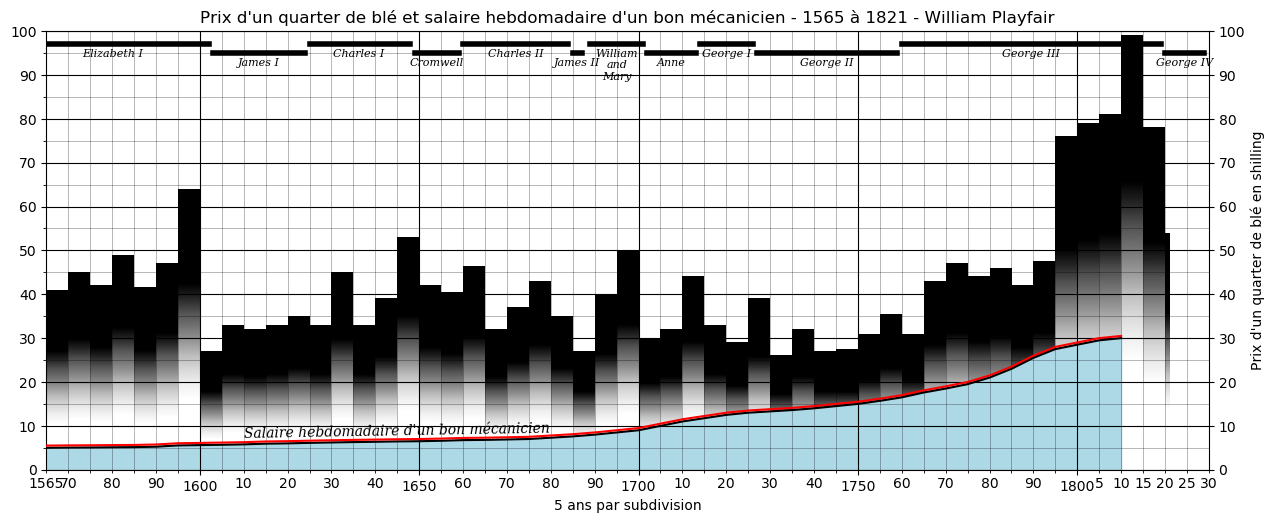

In [7]:
fig, ax = plt.subplots(1, figsize = (15,7), dpi=100)

# MODIFICATIONS DE PARAMÈTRES DE MATPLOTLIB POUR ENJOLIVER LE PLOT
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7
plt.rcParams['xtick.minor.pad'] = 3.5
plt.rcParams['xtick.major.pad'] = 3.5
plt.rcParams['font.family']='serif'
plt.rcParams['font.style']='italic'


# AFFICHAGES DES PRIX DU BLÉ EN UTILISANT PLT.IMSHOW POUR FAIRE LE DÉGRADÉ

for index in range(raw_data_wheat.index.size - 1):
    yearly_data = raw_data_wheat.iloc[index]
    year = yearly_data.Year
    next_year = raw_data_wheat.iloc[index + 1].Year
    width = next_year - yearly_data.Year
    height = yearly_data.Wheat
    y_scale = [[k] for k in np.arange(height+1)]
    ax.imshow(y_scale, 
              cmap = plt.cm.Greys, 
              interpolation = 'bicubic',
              extent = [year,next_year,0,height],
              origin='lower',
              # Les valeurs suivantes sont arbitraires et permettent
              # de choisir ou commence et termine le dégradé
              vmax=height/1.5, vmin=height/4,
              zorder=0
             )


# AFFICHAGE DES SALAIRES EN UTILISANT PLT.FILL_BETWEEN POUR FAIRE LE REMPLISSAGE

ax.fill_between(raw_data_wheat.Year, raw_data_wheat.Wages, color='lightblue')
ax.plot(raw_data_wheat.Year, raw_data_wheat.Wages, color='k')
# Le trait rouge est légèrement décalé vers le haut par rapport au noir
ax.plot(raw_data_wheat.Year, raw_data_wheat.Wages+0.5, color='r', zorder=100)
ax.text(x=1610, y=8.5,s="Salaire hebdomadaire d'un bon mécanicien",rotation=1)


# AFFICHAGE DES RÈGNES DES ROIS ET REINES

Y_even_kings = 97 
Y_odd_kings = 95
for index in range(data_kings.shape[0]):
    data_one_king = data_kings.iloc[index]
    if index%2 == 0:
        Y = Y_even_kings
    else:
        Y = Y_odd_kings
    ax.plot([data_one_king.Start, data_one_king.End-1],[Y,Y], color='k', linewidth=4)
    ax.text(x=(data_one_king.Start + data_one_king.End-1)/2,
            y=Y-1,
            s=data_one_king.Name,
            ha='center', va='top', fontsize=8)


# MODIFICATIONS DES AXES, TIRETS ET DE LA GRILLE POUR COLLER À L'ORIGINAL

# Limites des axes
ax.set_xlim(START_YEAR_PLOT, END_YEAR_PLOT)
ax.set_ylim(0, 1.01*raw_data_wheat.Wheat.max())

# On met les tirets et les étiquettes correspondantes
def format_minor_ticks(value, index):
    if value%50 == 0:
        return ""
    elif value == 1565:
        return str(int(value))
    elif (value%10 == 0) or (value > 1800):
        return str(int(value%100))
    else:
        return ""
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_formatter(ticker.FuncFormatter(format_minor_ticks))
plt.tick_params(labelleft=True, labelright=True, left=True, right=True)

# Ajout de la grille
ax.grid(True, which='minor',color='k',linewidth=0.4, alpha=0.5)
ax.grid(True, which='major',color='k' )

# Gestion  des titres des axes et de la figure
ax.set_xlabel('5 ans par subdivision')
ax.yaxis.set_label_position("right")
ax.set_ylabel("Prix d'un quarter de blé en shilling")
ax.set_title("Prix d'un quarter de blé et salaire hebdomadaire d'un bon mécanicien - 1565 à 1821 - William Playfair")

plt.show()

### Partie 2: amélioration des axes
Nous allons ici convertir les données dans des unités appropriés et les affichées avec leur axe propre. On a ici choisi une autre représentation sous forme de barre pour les deux quantités. Cette représentation permet d'un rapide coup d'oeil de voir l'évolution parallèle des deux quantités. Cepandant, cette représentation impose que les périodes représentées par les points soient équivalentes. On enlèvera donc les dernières données afin de terminer la courbe en 1820

In [9]:
data_wheat = raw_data_wheat.loc[raw_data_wheat.Year <1820].copy()

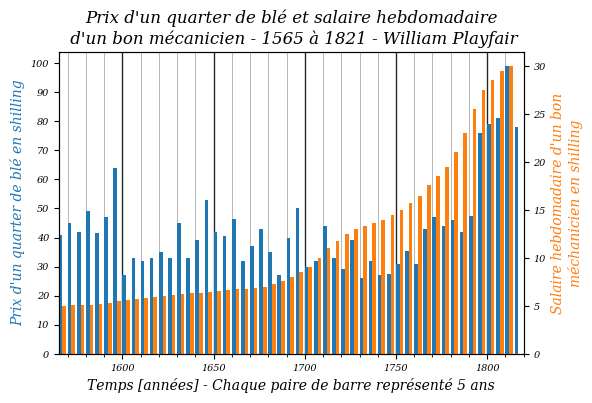

In [10]:
fig,ax = plt.subplots(1, dpi=100)
ax2 = ax.twinx()

# AFICHAGE DES QUANTITÉS DANS LEURS AXES PROPRES

ax.bar(data_wheat['Year'],data_wheat['Wheat'],width=2,align='edge',zorder=100)
# les barres des salaires sont légèrement décallées afin que tout soit affiché en entier.
ax2.bar(data_wheat['Year']+2,data_wheat['Wages'],width=2,align='edge',color='tab:orange')

# # MODIFICATIONS DES AXES, TIRETS ET DE LA GRILLE POUR COLLER À L'ORIGINAL

# Limites de la figure
ax.set_xlim(1565, 1820)

# On met les tirets et les étiquettes correspondantes
ax.xaxis.set_major_locator(ticker.MultipleLocator(50))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))


# Ajout de la grille
ax.grid(True, which='minor',color='k',linewidth=0.4, alpha=0.5,zorder=0)
ax.xaxis.grid(True, color='k',linewidth=1, alpha=0.8,zorder=0)


# Gestion  des titres des axes et de la figure
ax.set_xlabel('Temps [années] - Chaque paire de barre représenté 5 ans')
ax.set_ylabel("Prix d'un quarter de blé en shilling", color ='tab:blue')
ax2.set_ylabel("Salaire hebdomadaire d'un bon\nméchanicien en shilling", color ='tab:orange')
ax.set_title("Prix d'un quarter de blé et salaire hebdomadaire\n d'un bon mécanicien - 1565 à 1821 - William Playfair")

plt.show()


 ### Partie 3: représentation de quantité plus appropriées
 On va ici faire deux représentation
 - tout d'abord, on calculera et représentera l'évolution du pouvoir d'achat (quantité de blé achetable par semaine)
 - On réalisera ensuite une figure comparant le prix du blé en abscisse et les salaires en ordonnées. La couleur des point représentera l'évolution temporelle et leur taille le pouvoir d'achat. Notons que l'on convertit les quarts en livres pour obtenir des valeurs de pouvoirs d'achat de plusieurs unités.
 

In [11]:
# Calcul du pouvoir d'achat
QUART_TO_POUNDS = 15
data_wheat.loc[:,'pouvoir_achat'] = data_wheat['Wages']/data_wheat['Wheat']*QUART_TO_POUNDS

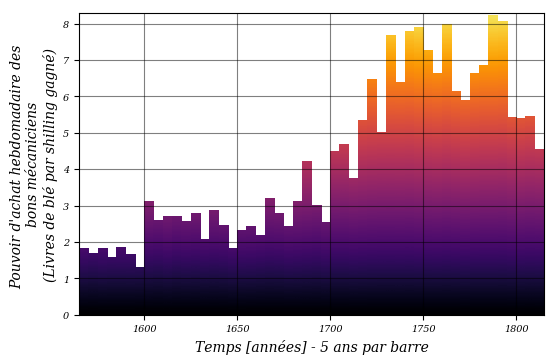

In [176]:
fig, ax = plt.subplots(1, dpi=100)
for index in range(data_wheat.index.size-1):
    yearly_data = data_wheat.iloc[index]
    year = yearly_data.Year
    next_year=year+5
    height = yearly_data.pouvoir_achat
    y_scale = [[k] for k in np.arange(0,height+0.1,0.1)]
    ax.imshow(y_scale, 
              cmap = plt.cm.inferno, 
              interpolation = 'bicubic',
              extent = [year,next_year,0,height],
              origin='lower',
              vmax=9, vmin=0,
              zorder=0,
              aspect="auto"
             )
    

# MODIFICATIONS DES AXES, TIRETS ET DE LA GRILLE POUR COLLER À L'ORIGINAL

# Limites des axes
ax.set_xlim(1565,1815)
ax.set_ylim(0, 1.01*data_wheat.pouvoir_achat.max())

# On met les tirets et les étiquettes correspondantes

# Ajout de la grille
ax.xaxis.grid(True, which='major',color='k', alpha = 0.5,zorder=110)
ax.yaxis.grid(True, which='major',color='k', alpha = 0.5,zorder=110)


# Gestion  des titres des axes et de la figure
ax.set_xlabel('Temps [années] - 5 ans par barre')
ax.yaxis.set_label('left')
ax.set_ylabel("Pouvoir d'achat hebdomadaire des \nbons mécaniciens\n(Livres de blé par shilling gagné)")

plt.show()

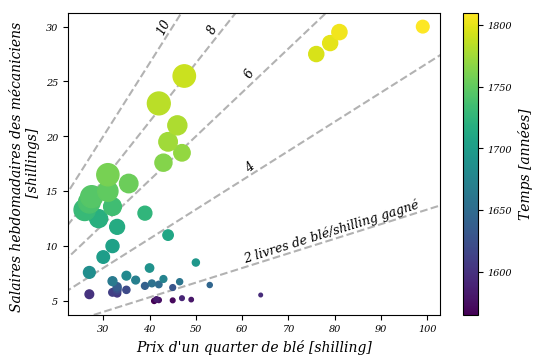

In [179]:
fig, ax = plt.subplots(1, dpi=100)
sizes = (data_wheat.pouvoir_achat*2)**2

# Plot le nuage de points
scatter = ax.scatter(data_wheat.Wheat, data_wheat.Wages,s=sizes, cmap='viridis',c =data_wheat.Year)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Plot les lignes iso-pouvoird'achat: deux points sur une meme ligne ont le meme pouvoir d'achat
wheat_for_iso = np.array([0, 150])
xy = [(60,13.5), (60,17), (60,25.5), (52,29.5), (41,30)]
rotations = [17.5, 40, 60, 62, 63]
texts = ['2 livres de blé/shilling gagné',
         '4','6','8','10']
for pouvoir_achat in range(2,11, 2):
    ax.plot(wheat_for_iso, pouvoir_achat/15*wheat_for_iso, color = 'k', alpha=0.3, zorder=0, linestyle='--')
    ax.text(*xy[pouvoir_achat//2-1],
            s=texts[pouvoir_achat//2-1],
            rotation=rotations[pouvoir_achat//2-1], 
            fontsize=9)
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Ajout d'une colorbar pour les années
cbar = plt.colorbar(scatter,ax=ax)
cbar.set_label('Temps [années]')

# Ajout des titres aux axes et à la figure
ax.set_ylabel('Salaires hebdomadaires des mécaniciens \n [shillings]')
ax.set_xlabel("Prix d'un quarter de blé [shilling]")

plt.show()